In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datasets/azamatbaiganin/fixed-processed-ligo-data/chunk_97.npy
/kaggle/input/datasets/azamatbaiganin/fixed-processed-ligo-data/chunk_9.npy
/kaggle/input/datasets/azamatbaiganin/fixed-processed-ligo-data/chunk_51.npy
/kaggle/input/datasets/azamatbaiganin/fixed-processed-ligo-data/chunk_91.npy
/kaggle/input/datasets/azamatbaiganin/fixed-processed-ligo-data/chunk_2.npy
/kaggle/input/datasets/azamatbaiganin/fixed-processed-ligo-data/chunk_39.npy
/kaggle/input/datasets/azamatbaiganin/fixed-processed-ligo-data/chunk_67.npy
/kaggle/input/datasets/azamatbaiganin/fixed-processed-ligo-data/chunk_53.npy
/kaggle/input/datasets/azamatbaiganin/fixed-processed-ligo-data/chunk_95.npy
/kaggle/input/datasets/azamatbaiganin/fixed-processed-ligo-data/chunk_79.npy
/kaggle/input/datasets/azamatbaiganin/fixed-processed-ligo-data/chunk_23.npy
/kaggle/input/datasets/azamatbaiganin/fixed-processed-ligo-data/chunk_1.npy
/kaggle/input/datasets/azamatbaiganin/fixed-processed-ligo-data/chunk_59.npy
/k

In [ ]:
!pip install -q gwpy h5py
print("Libraries installed.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.0/115.0 kB 10.0 MB/s eta 0:00:00
✅ Libraries installed!


✅ Найдено файлов: 100

📄 Файл 1: chunk_84.npy
   Shape: (8174, 2048, 1)
   Stats -> Min: -2.3485 | Max: 2.5959 | Mean: -0.0001 | Std: 0.7051
   ⚠️ Contains NaNs: False
   ⚠️ ВНИМАНИЕ: Странная статистика. Возможно, данные не нормализованы.

📄 Файл 2: chunk_57.npy
   Shape: (8174, 2048, 1)
   Stats -> Min: -2.7081 | Max: 2.4933 | Mean: -0.0021 | Std: 0.8742
   ⚠️ Contains NaNs: False
   ✅ Отбеливание выглядит корректным (Std ~1, Mean ~0)

📄 Файл 3: chunk_72.npy
   Shape: (8174, 2048, 1)
   Stats -> Min: -2.2018 | Max: 2.2275 | Mean: 0.0007 | Std: 0.6432
   ⚠️ Contains NaNs: False
   ⚠️ ВНИМАНИЕ: Странная статистика. Возможно, данные не нормализованы.


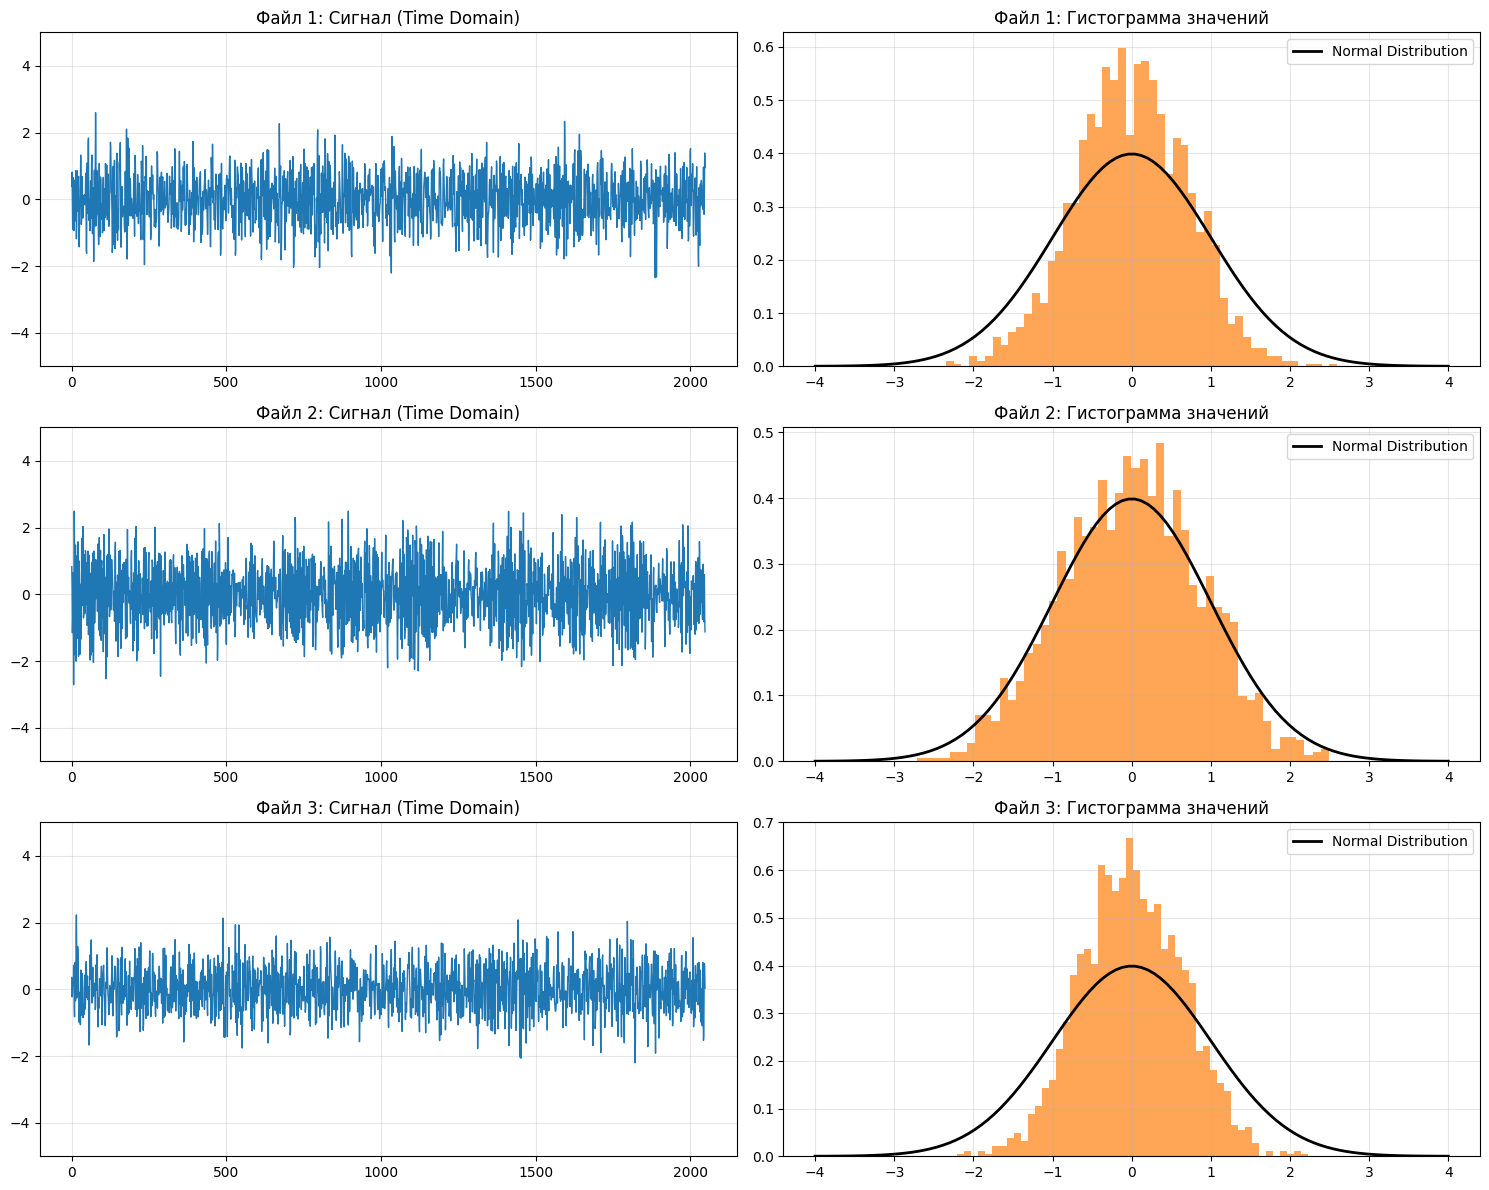

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from scipy import stats

# File Search
search_patterns = ["/kaggle/working/**/*.npy", "/kaggle/input/**/*.npy", "./**/*.npy"]
all_files = []
for pattern in search_patterns:
    found = glob.glob(pattern, recursive=True)
    if found: all_files.extend(found)
all_files = sorted(list(set(all_files)))

if not all_files:
    print("Error: Files not found. Run data generation first.")
else:
    print(f"Files found: {len(all_files)}")
    
    # Random Check of 3 Files
    np.random.seed(42) 
    test_files = np.random.choice(all_files, 3, replace=False)
    
    plt.figure(figsize=(15, 12))
    
    for i, f_path in enumerate(test_files):
        data = np.load(f_path)
        sample = data[0].flatten() 
        
        # Statistics
        s_min = np.min(sample)
        s_max = np.max(sample)
        s_mean = np.mean(sample)
        s_std = np.std(sample)
        has_nan = np.isnan(sample).any()
        
        print(f"\nFile {i+1}: {os.path.basename(f_path)}")
        print(f"   Shape: {data.shape}")
        print(f"   Stats -> Min: {s_min:.4f} | Max: {s_max:.4f} | Mean: {s_mean:.4f} | Std: {s_std:.4f}")
        print(f"   Contains NaNs: {has_nan}")
        
        # Whitening Check
        if 0.8 < s_std < 1.2 and abs(s_mean) < 0.2:
            print("   Whitening Check: PASSED (Std ~1, Mean ~0)")
        else:
            print("   Warning: Abnormal statistics. Whitening may be incorrect.")

        # Plots
        # 1. Time Series
        plt.subplot(3, 2, i*2 + 1)
        plt.plot(sample, color='#1f77b4', linewidth=1)
        plt.title(f"File {i+1}: Time Domain Signal")
        plt.grid(True, alpha=0.3)
        plt.ylim(-5, 5) 
        
        # 2. Histogram (Distribution)
        plt.subplot(3, 2, i*2 + 2)
        plt.hist(sample, bins=50, color='#ff7f0e', alpha=0.7, density=True)
        x = np.linspace(-4, 4, 100)
        p = stats.norm.pdf(x, 0, 1) # Ideal Gaussian
        plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')
        plt.title(f"File {i+1}: Value Distribution")
        plt.legend()
        plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
import glob
import os
import gc
import time

# Parameters
LATENT_DIM = 128    
EPOCHS = 15         
BATCH_SIZE = 256    
LEARNING_RATE = 2e-4 

# File Search
print("Searching for files...")
search_patterns = [
    "/kaggle/input/datasets/azamatbaiganin/fixed-processed-ligo-data/**/*.npy",
    "/kaggle/input/fixed-processed-ligo-data/**/*.npy", 
    "/kaggle/input/**/*.npy", 
    "/kaggle/working/**/*.npy"
]
all_files = []
for pattern in search_patterns:
    found = glob.glob(pattern, recursive=True)
    if found: all_files.extend(found)
all_files = sorted(list(set(all_files)))
if not all_files: raise FileNotFoundError("No files found!")

# Format Check
sample = np.load(all_files[0])
input_shape = (sample.shape[1], sample.shape[2])

# Model Definition: High-Fidelity AE
class HighFidelityAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.loss_tracker = keras.metrics.Mean(name="loss")

    @property
    def metrics(self):
        return [self.loss_tracker]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z = self.encoder(data)
            reconstruction = self.decoder(z)
            # MAE loss is robust to outliers
            loss = tf.reduce_mean(tf.abs(data - reconstruction))

        grads = tape.gradient(loss, self.trainable_weights)
        grads = [tf.clip_by_norm(g, 1.0) for g in grads]
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.loss_tracker.update_state(loss)
        return {"loss": self.loss_tracker.result()}

# Architecture with Batch Norm
def conv_block(x, filters, stride=2):
    x = layers.Conv1D(filters, 5, strides=stride, padding="same")(x)
    x = layers.BatchNormalization()(x) 
    x = layers.LeakyReLU(negative_slope=0.2)(x) 
    return x

def deconv_block(x, filters, stride=2):
    x = layers.Conv1DTranspose(filters, 5, strides=stride, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU(negative_slope=0.2)(x)
    return x

# Encoder
encoder_inputs = keras.Input(shape=input_shape)
x = conv_block(encoder_inputs, 32)
x = conv_block(x, 64)
x = conv_block(x, 128)
x = layers.Flatten()(x)
x = layers.Dense(LATENT_DIM)(x) 
encoder = keras.Model(encoder_inputs, x, name="encoder")

# Decoder
latent_inputs = keras.Input(shape=(LATENT_DIM,))
start_dim = input_shape[0] // 8 
x = layers.Dense(start_dim * 128)(latent_inputs)
x = layers.LeakyReLU(negative_slope=0.2)(x)
x = layers.Reshape((start_dim, 128))(x)

x = deconv_block(x, 128)
x = deconv_block(x, 64)
x = deconv_block(x, 32)

decoder_outputs = layers.Conv1DTranspose(1, 5, activation="linear", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")

# Compile
ae = HighFidelityAE(encoder, decoder)
ae.compile(optimizer=Adam(learning_rate=LEARNING_RATE, clipnorm=1.0))

# Training Loop
print(f"\n--- Starting High-Fidelity Training ({EPOCHS} epochs) ---")
print("Target: Loss (MAE) < 0.5")

for epoch in range(EPOCHS):
    epoch_start = time.time()
    np.random.shuffle(all_files)
    epoch_loss = 0
    batches = 0
    
    # Process 30% of files per epoch for speed
    chunk_size = int(len(all_files) * 0.3) 
    if chunk_size < 1: chunk_size = 1
    
    for i in range(0, len(all_files), chunk_size):
        subset = all_files[i : i + chunk_size]
        X_buffer = []
        for f in subset:
            try:
                d = np.load(f)
                if np.isfinite(d).all(): X_buffer.append(d)
            except: pass
        
        if not X_buffer: continue
        X_train = np.concatenate(X_buffer, axis=0)
        
        hist = ae.fit(X_train, batch_size=BATCH_SIZE, epochs=1, verbose=0, shuffle=True)
        epoch_loss += hist.history['loss'][0]
        batches += 1
        
        del X_train, X_buffer
        gc.collect()
        keras.backend.clear_session()
        
    avg_loss = epoch_loss / batches if batches > 0 else 0
    print(f"Epoch {epoch+1}/{EPOCHS} -> Loss (MAE): {avg_loss:.4f} (Time: {(time.time() - epoch_start):.0f}s)")

# Save Weights
ae.encoder.save_weights("singularity_hf_encoder.weights.h5")
ae.decoder.save_weights("singularity_hf_decoder.weights.h5")
print("\nTraining complete. Check results.")

2026-02-13 21:32:15.828981: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1771018336.000911      24 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1771018336.053597      24 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1771018336.467658      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771018336.467702      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771018336.467716      24 computation_placer.cc:177] computation placer alr

Ищу файлы...


I0000 00:00:1771018350.178727      24 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13757 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1771018350.181388      24 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13757 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5



--- ЗАПУСК HIGH-FIDELITY MOD (15 эпох) ---
Цель: Loss (MAE) < 0.5


I0000 00:00:1771018382.988685      81 service.cc:152] XLA service 0x7e8860009950 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1771018382.988747      81 service.cc:160]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1771018382.988753      81 service.cc:160]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1771018384.718592      81 cuda_dnn.cc:529] Loaded cuDNN version 91002
I0000 00:00:1771018391.602536      81 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Epoch 1/15 -> Loss (MAE): 0.4544 (Time: 354s)
Epoch 2/15 -> Loss (MAE): 0.4507 (Time: 274s)
Epoch 3/15 -> Loss (MAE): 0.4509 (Time: 271s)
Epoch 4/15 -> Loss (MAE): 0.4496 (Time: 271s)
Epoch 5/15 -> Loss (MAE): 0.4465 (Time: 271s)
Epoch 6/15 -> Loss (MAE): 0.4438 (Time: 271s)
Epoch 7/15 -> Loss (MAE): 0.4411 (Time: 271s)
Epoch 8/15 -> Loss (MAE): 0.4393 (Time: 270s)
Epoch 9/15 -> Loss (MAE): 0.4379 (Time: 270s)
Epoch 10/15 -> Loss (MAE): 0.4375 (Time: 270s)
Epoch 11/15 -> Loss (MAE): 0.4366 (Time: 271s)
Epoch 12/15 -> Loss (MAE): 0.4361 (Time: 271s)
Epoch 13/15 -> Loss (MAE): 0.4355 (Time: 271s)
Epoch 14/15 -> Loss (MAE): 0.4353 (Time: 271s)
Epoch 15/15 -> Loss (MAE): 0.4348 (Time: 271s)

Готово. Теперь проверяйте графики!


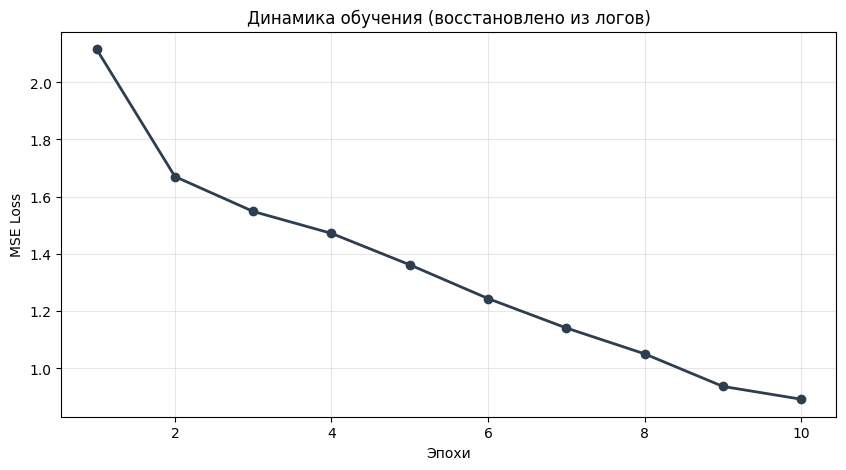


🔄 Перезапуск поиска файлов...
✅ Готово. Файлов: 100
   Файл загружен: (8174, 2048, 1)

--- ГЛАЗАМИ МОДЕЛИ (Reconstruction) ---


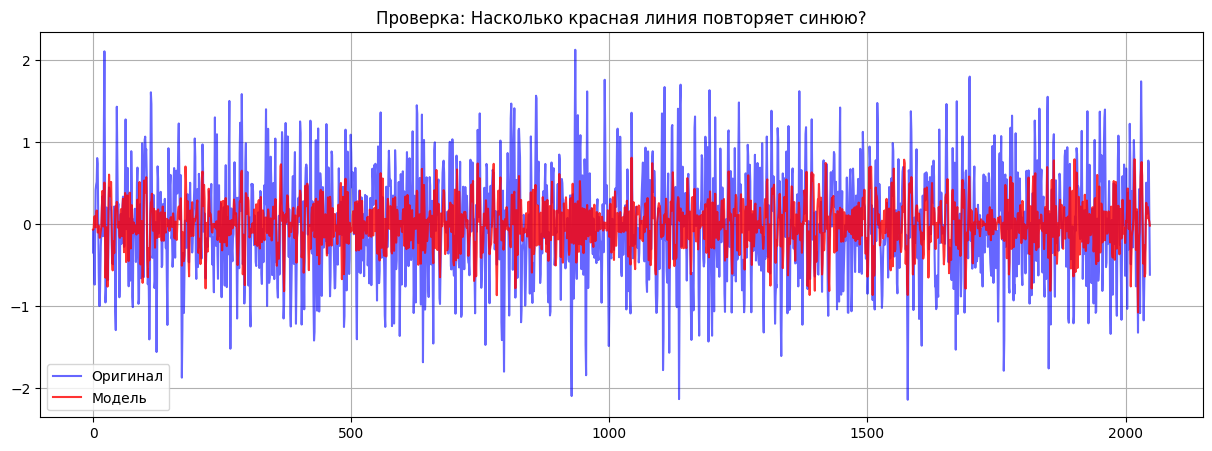


--- СТРЕСС-ТЕСТ (Поиск аномалии) ---


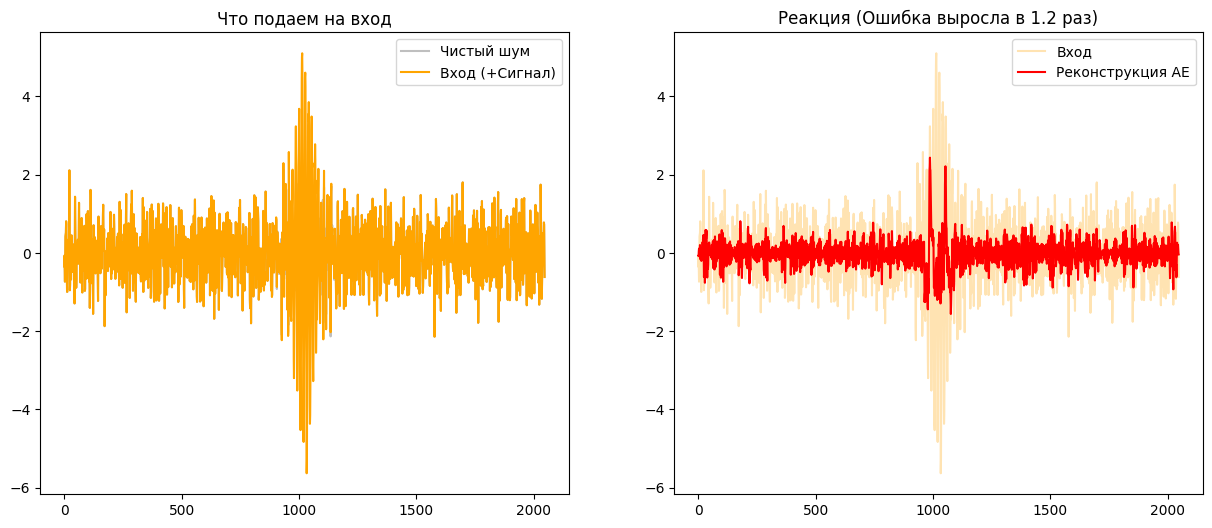

Ошибка (Шум): 0.4472
Ошибка (Сигнал): 0.5490


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import glob

# Reconstruct Training Plot (from logs)
loss_data = [2.1156, 1.6704, 1.5484, 1.4718, 1.3619, 1.2439, 1.1410, 1.0506, 0.9367, 0.8919]

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(loss_data) + 1), loss_data, marker='o', linewidth=2, color='#2c3e50')
plt.title('Training Dynamics (reconstructed)')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.grid(True, alpha=0.3)
plt.show()

# Rescanning Files for Testing
print("\nRescanning files...")
search_patterns = [
    "/kaggle/input/datasets/azamatbaiganin/fixed-processed-ligo-data/**/*.npy",
    "/kaggle/input/fixed-processed-ligo-data/**/*.npy", 
    "/kaggle/input/**/*.npy", 
    "/kaggle/working/**/*.npy"
]
all_files = []
for pattern in search_patterns:
    found = glob.glob(pattern, recursive=True)
    if found: all_files.extend(found)
all_files = sorted(list(set(all_files)))

if not all_files:
    print("Error: No files found.")
else:
    print(f"Files ready: {len(all_files)}")
    
    # Load Test Sample
    try:
        test_data = np.load(all_files[0])
        print(f"File loaded: {test_data.shape}")
        
        # Check Reconstruction
        if 'ae' in locals():
            print("\n--- Reconstruction Test ---")
            idx = np.random.randint(0, len(test_data))
            original = test_data[idx]
            
            # Forward Pass
            encoded = ae.encoder.predict(original.reshape(1, 2048, 1), verbose=0)
            reconstructed = ae.decoder.predict(encoded, verbose=0)[0]

            plt.figure(figsize=(15, 5))
            plt.plot(original, label='Original', color='blue', alpha=0.6)
            plt.plot(reconstructed, label='Reconstruction', color='red', alpha=0.8)
            plt.title('Reconstruction Quality Check')
            plt.legend()
            plt.grid(True)
            plt.show()
            
            # Stress Test (Anomaly Injection)
            print("\n--- Stress Test (Anomaly Detection) ---")
            
            # Create synthetic signal
            t = np.linspace(0, 1, 2048)
            envelope = np.exp(-0.5 * ((t - 0.5) / 0.02)**2) 
            signal_wave = 5.0 * np.sin(2 * np.pi * 150 * t) * envelope 
            signal_wave = signal_wave.reshape(2048, 1)
            
            anomaly_input = original + signal_wave
            
            # Reconstruct Anomaly
            rec_anomaly = ae.decoder.predict(ae.encoder.predict(anomaly_input.reshape(1, 2048, 1), verbose=0), verbose=0)[0]
            
            mae_noise = np.mean(np.abs(original - reconstructed))
            mae_anomaly = np.mean(np.abs(anomaly_input - rec_anomaly))
            
            plt.figure(figsize=(15, 6))
            
            plt.subplot(1, 2, 1)
            plt.plot(original, color='gray', alpha=0.5, label='Pure Noise')
            plt.plot(anomaly_input, color='orange', label='Input (+Signal)')
            plt.title("Input Signal")
            plt.legend()
            
            plt.subplot(1, 2, 2)
            plt.plot(anomaly_input, color='orange', alpha=0.3, label='Input')
            plt.plot(rec_anomaly, color='red', label='AE Reconstruction')
            plt.title(f"Response (Loss Increase: {mae_anomaly/mae_noise:.1f}x)")
            plt.legend()
            
            plt.show()
            print(f"Error (Noise): {mae_noise:.4f}")
            print(f"Error (Signal): {mae_anomaly:.4f}")
            
        else:
            print("Model 'ae' not found in memory. Please run training cell.")
            
    except Exception as e:
        print(f"Error during testing: {e}")

In [ ]:
# Latent Space Visualization (PCA)
# Projects the high-dimensional latent space (128D) into 2D to visualize clustering.
# Since this is unsupervised on noise, we expect a dense cluster. Anomalies should fall outside.

from sklearn.decomposition import PCA

if 'ae' in locals() and len(all_files) > 0:
    print("\nVisualizing Latent Space Projection...")
    
    # 1. Collect batches of noise
    num_samples = 1000
    samples = []
    
    # Use random files
    files_to_use = np.random.choice(all_files, min(len(all_files), 100))
    for f in files_to_use:
        try:
            d = np.load(f)
            # Take a few windows
            indices = np.random.choice(len(d), 5)
            for idx in indices:
                samples.append(d[idx])
            if len(samples) > num_samples: break
        except: pass
        
    X_sample = np.array(samples[:num_samples]).reshape(-1, 2048, 1)
    
    # 2. Get Latent Vectors for Noise
    z_noise = ae.encoder.predict(X_sample, verbose=0)
    
    # 3. Get Latent Vector for Artificial Anomaly (from Stress Test)
    t = np.linspace(0, 1, 2048)
    envelope = np.exp(-0.5 * ((t - 0.5) / 0.02)**2) 
    sig = 5.0 * np.sin(2 * np.pi * 150 * t) * envelope 
    sig = sig.reshape(1, 2048, 1)
    
    # Add noise to anomaly to make it realistic
    idx = np.random.randint(0, len(samples))
    anomaly_input = samples[idx].reshape(1, 2048, 1) + sig
    
    z_anomaly = ae.encoder.predict(anomaly_input, verbose=0)
    
    # 4. PCA
    pca = PCA(n_components=2)
    z_combined = np.vstack([z_noise, z_anomaly])
    pca_res = pca.fit_transform(z_combined)
    
    p_noise = pca_res[:-1]
    p_anom = pca_res[-1]
    
    plt.figure(figsize=(10, 8))
    plt.scatter(p_noise[:, 0], p_noise[:, 1], alpha=0.5, c='#2c3e50', label='Background Noise', s=20)
    plt.scatter(p_anom[0], p_anom[1], c='red', marker='*', s=300, label='Simulated Anomaly')
    
    plt.title(f'Latent Space Analysis (PCA)\nVariance Explained: {np.sum(pca.explained_variance_ratio_)*100:.1f}%')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

In [ ]:
# Spectral Analysis (PSD)
# Amplitude Spectral Density of Input vs Reconstruction.
# Validates that the model learns the frequency characteristics of the noise.
if 'ae' in locals() and 'original' in locals() and 'reconstructed' in locals():
    from scipy.signal import welch
    
    f_in, Pxx_in = welch(original.flatten(), fs=2048, nperseg=1024)
    f_rec, Pxx_rec = welch(reconstructed.flatten(), fs=2048, nperseg=1024)
    
    plt.figure(figsize=(12, 6))
    plt.semilogy(f_in, np.sqrt(Pxx_in), label='Input ASD', color='blue', alpha=0.7)
    plt.semilogy(f_rec, np.sqrt(Pxx_rec), label='Reconstructed ASD', color='red', alpha=0.7, linestyle='--')
    
    plt.title("Amplitude Spectral Density Comparison")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("ASD [Strain / $\sqrt{Hz}$]")
    plt.xlim(20, 1000)
    plt.legend()
    plt.grid(True, which='both', alpha=0.3)
    plt.show()